# Assignment 9 (Association Rules) my_movies dataset

## Q. Prepare rules for the all the data sets 
## 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
## 2) Change the minimum length in apriori algorithm
## 3) Visulize the obtained rules using different plots 

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.special import comb
from itertools import combinations, permutations
from mlxtend.frequent_patterns import apriori, association_rules
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

In [2]:
my_movies_df = pd.read_csv("my_movies.csv")

In [3]:
my_movies_df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
my_movies_df1 = my_movies_df.iloc[:,5:]

In [5]:
my_movies_df1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [6]:
my_movies_df1.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
my_movies_df1.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [8]:
my_movies_df1.dtypes

Sixth Sense      int64
Gladiator        int64
LOTR1            int64
Harry Potter1    int64
Patriot          int64
LOTR2            int64
Harry Potter2    int64
LOTR             int64
Braveheart       int64
Green Mile       int64
dtype: object

In [9]:
my_movies_df1.shape

(10, 10)

In [10]:
item_sets_val = {}

In [11]:
tse = TransactionEncoder()

In [12]:
tse_ary = tse.fit(my_movies_df1).transform(my_movies_df1)

In [13]:
apr = pd.DataFrame(tse_ary, columns=tse.columns_)

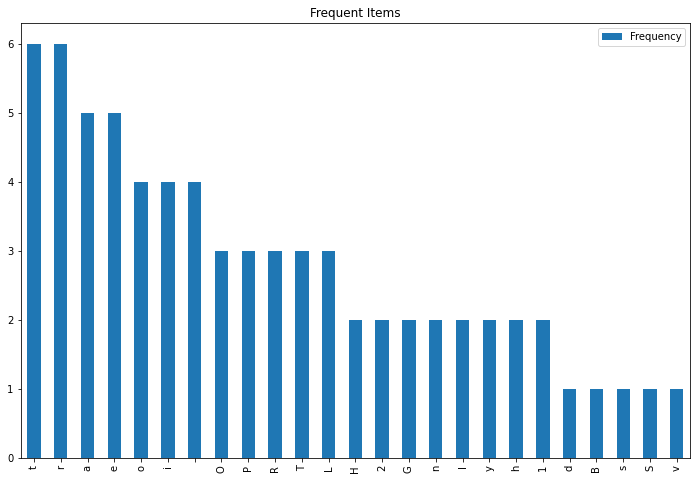

In [14]:
apr.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',
                                                                                  figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

## Apriori Algorithm 

In [15]:
apr_0_5 = {}
apr_1 = {}
apr_5 = {}
apr_1_0 = {}

In [16]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [17]:
def gen_rules(my_movies_df,confidence,support):
    apr = {}
    for i in confidence:
        apr_i = apriori(my_movies_df1,support,True)
        rule = association_rules(apr_i,min_threshold=i)
        apr[i] = len(rule.antecedents)
    return pd.Series(apr).to_frame("Support: %s"%support)

In [18]:
conf = []

In [19]:
for i in [0.005,0.001,0.003,0.007]:
    apr_i = gen_rules(apr,confidence=confidence,support=i)
    conf.append(apr_i)

In [20]:
all_conf = pd.concat(conf,axis=1)

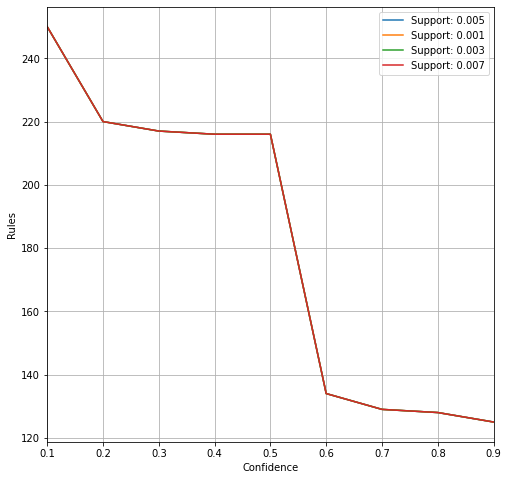

In [21]:
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

## Conclusion :

## As shown in above graph

   ## Lower the Confidence level Higher the no. of rules.
   ## Higher the Support, lower the no. of rules.

## Lets try with Support 0.005 and Confidence at 0.4

In [22]:
apr_final =  apriori(apr,0.005,True)

In [23]:
rules_final = association_rules(apr_final,min_threshold=.4,support_only=False)

In [24]:
rules_final[rules_final['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(H),( ),0.2,0.4,0.2,1.000000,2.500000,0.12,inf
5,(M),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf
6,(P),( ),0.3,0.4,0.2,0.666667,1.666667,0.08,1.8
8,(S),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf
11,(e),( ),0.5,0.4,0.4,0.800000,2.000000,0.20,3.0
12,( ),(e),0.4,0.5,0.4,1.000000,2.000000,0.20,inf
17,(n),( ),0.2,0.4,0.2,1.000000,2.500000,0.12,inf
22,( ),(r),0.4,0.6,0.3,0.750000,1.250000,0.06,1.6
23,(s),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf
25,( ),(t),0.4,0.6,0.3,0.750000,1.250000,0.06,1.6


In [25]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

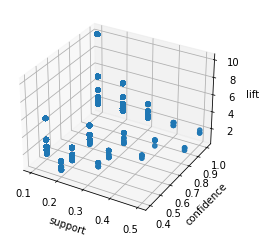

In [26]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

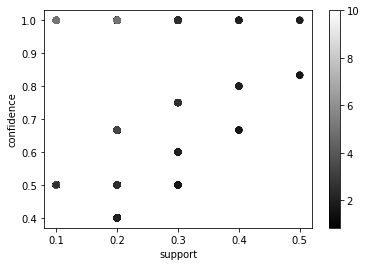

In [27]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support")
plt.ylabel("confidence")